In [62]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
# Load your dataset from CSV
# Replace 'your_data.csv' with the actual path to your CSV file
data = pd.read_csv('/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint.csv')

In [64]:
# Extract features and labels
# The first column is the label (gesture class), and the remaining columns are the landmarks (x1, y1, ..., x21, y21)
X = data.iloc[:, 1:].values  # All rows, columns from the second column onward (landmarks)
y = data.iloc[:, 0].values   # All rows, the first column (gesture labels)

In [65]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Build the CNN-like model
model = models.Sequential()

# Reshape input data to be in 2D format, treat the input as 42 landmarks (42 features)
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

# Add a Dense layer (since input is already 1D)
model.add(layers.Dense(128, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Another Dense layer for further processing
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(np.unique(y).shape[0], activation='softmax'))  # Number of classes in the target

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/tingtim/Code/hand-gesture-recognition-mediapipe/hg-envnew/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [67]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [68]:
# Print model summary to see the architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,628 (100.11 KB)

 Trainable params: 25,628 (100.11 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=500, 
    batch_size=32, 
    validation_data=(X_val, y_val)
)

Epoch 1/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2236 - loss: 2.7048 - val_accuracy: 0.7099 - val_loss: 1.0542
Epoch 2/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6447 - loss: 1.1198 - val_accuracy: 0.8356 - val_loss: 0.6307
Epoch 3/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7472 - loss: 0.8241 - val_accuracy: 0.8860 - val_loss: 0.4778
Epoch 4/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.6844 - val_accuracy: 0.8974 - val_loss: 0.4039
Epoch 5/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8219 - loss: 0.5795 - val_accuracy: 0.8936 - val_loss: 0.3822
Epoch 6/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8396 - loss: 0.5093 - val_accuracy: 0.8833 - val_loss: 0.3692
Epoch 7/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4842 - val_accuracy: 0.9159 - val_loss: 0.3042
Epoch 8/500
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.4462 - val_accu

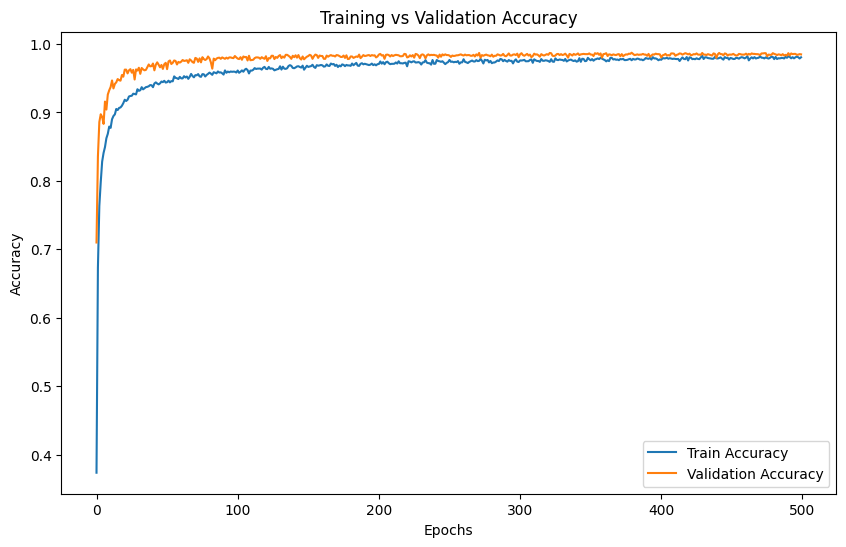

In [70]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

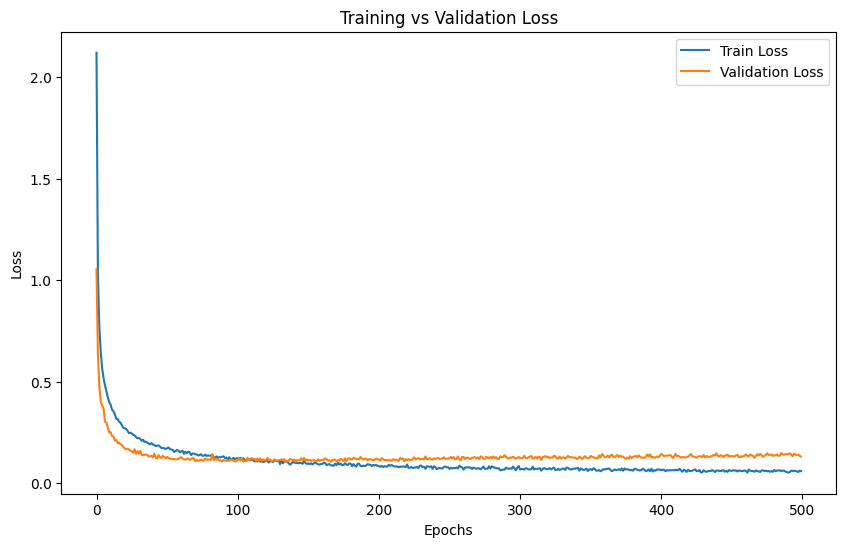

In [71]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9859 - loss: 0.1093
Validation Loss: 0.1319856196641922
Validation Accuracy: 0.9848952889442444


In [73]:
model.save('model/keypoint_classifier/cnn_hand_gesture_model.h5', include_optimizer=False)
model.export('/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModelCNN')

INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModelCNN/assets


INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModelCNN/assets


Saved artifact at '/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModelCNN'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_55')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  129640298411408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129640298408528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970081104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970082832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129640292743504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970079952: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [74]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open('model/keypoint_classifier/cnn_hand_gesture_model.tflite', 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpmzan6cvu/assets


INFO:tensorflow:Assets written to: /tmp/tmpmzan6cvu/assets


Saved artifact at '/tmp/tmpmzan6cvu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_55')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  129640298411408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129640298408528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970081104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970082832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129640292743504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639970079952: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746080056.393385   31798 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746080056.393402   31798 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-01 14:14:16.393623: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpmzan6cvu
2025-05-01 14:14:16.394163: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-01 14:14:16.394177: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpmzan6cvu
2025-05-01 14:14:16.397250: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-01 14:14:16.416322: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpmzan6cvu
2025-05-01 14:14:16.421717: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 28099 microseconds.


32120